# 几何变换

In [19]:
import cv2
import numpy as np
import SimpleITK as sitk
from matplotlib import pyplot as plt
filename = r'data/2/body.nii'
ct2 = sitk.ReadImage(filename)
ct2_array = sitk.GetArrayFromImage(ct2)

In [20]:
filename = r'data/2/segmentation.nii'
ct2s = sitk.ReadImage(filename)
ct2s_array = sitk.GetArrayFromImage(ct2s)

In [21]:
ct2_array.shape[0]

61

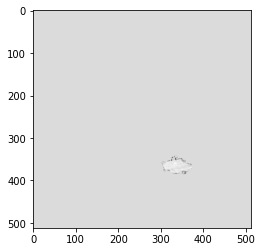

In [22]:
data = ct2s_array[30, : ,:]* ct2_array[30, : ,:]
plt.imshow(data, cmap='gray')
plt.show()

**1、warpAffined函数详解**

In [ ]:
# 待查

**2、getRotationMatrix2D函数详解**

In [ ]:
#待查

缩放

In [10]:
for i in range(ct2_array.shape[0]):
    print(ct2_array[i, : ,:].shape)

(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)


1、平移

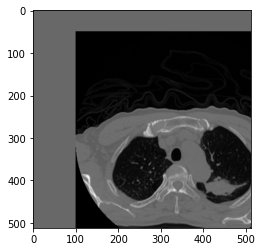

In [35]:
data = ct2_array[30, : ,:]
img = np.expand_dims(data,2)
rows,cols,channel = img.shape

M  = np.float32([[1,0,100],[0,1,50]])
dst = cv2.warpAffine(img, M, (cols,rows))

plt.imshow(dst, cmap='gray')
plt.show()

2、旋转

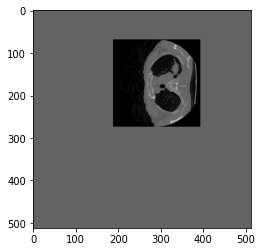

In [34]:
data = ct2_array[30, : ,:]
img = np.expand_dims(data,2)
rows,cols,channel = img.shape

M  = cv2.getRotationMatrix2D((cols/2,rows/3),90,0.4)
dst = cv2.warpAffine(img, M, (cols,rows))

plt.imshow(dst, cmap='gray')
plt.show()

3、仿射变换

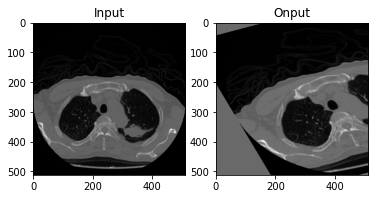

In [38]:
data = ct2_array[30, : ,:]
img = np.expand_dims(data,2)
rows,cols,channel = img.shape

pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])

M  = cv2.getAffineTransform(pts1,pts2)
dst = cv2.warpAffine(img, M, (cols,rows))

plt.subplot(121),plt.imshow(img,cmap='gray'),plt.title('Input')
plt.subplot(122),plt.imshow(dst,cmap='gray'),plt.title('Onput')
plt.show()

4、透视变换

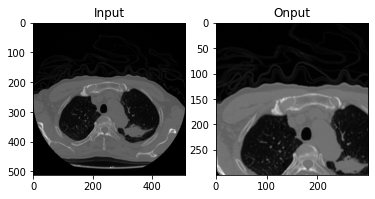

In [42]:
data = ct2_array[30, : ,:]
img = np.expand_dims(data,2)
rows,cols,channel = img.shape

pts1 = np.float32([[56,65],[368,52],[28,387],[389,390]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])

M  = cv2.getPerspectiveTransform(pts1,pts2)
dst = cv2.warpPerspective(img, M, (300,300))

plt.subplot(121),plt.imshow(img,cmap='gray'),plt.title('Input')
plt.subplot(122),plt.imshow(dst,cmap='gray'),plt.title('Onput')
plt.show()